https://librosa.org/doc/main/index.html

In [55]:
file_nutcracker = 'librosa/nutcracker.ogg'
file_choice = 'librosa/choice.ogg'
file_trumpet = 'librosa/trumpet.ogg'
file_brahms = 'librosa/brahms.ogg'

## Quickstart

In [56]:
# Beat tracking example
import librosa

# 1. Get the file path to an included audio example
filename = file_nutcracker
#filename = librosa.example('nutcracker')

# 2. Load the audio as a waveform `y` = the audio as a time series (a 1D NumPy floating point array)
#    Store the sampling rate as `sr` =  the sampling rate of y, that is, the number of samples per second of audio
y, sr = librosa.load(filename)
print("y:", y[:20])
print("sr:", sr)
# By default, all audio is mixed to mono and resampled to 22050 Hz at load time.

# 3. Run the default beat tracker
tempo, beat_frames = librosa.beat.beat_track(y=y, sr=sr)
print('\nEstimated tempo: {:.2f} beats per minute\n'.format(tempo))
# The output of the beat tracker is an estimate of the tempo (in beats per minute), 
# and an array of frame numbers corresponding to detected beat events.
print("beat_frames:", beat_frames[:10])

# 4. Convert the frame indices of beat events into timestamps
beat_times = librosa.frames_to_time(beat_frames, sr=sr)
print("beat_times:", beat_times[:10])

y: [ 2.27168607e-06  5.33272078e-06 -7.24732899e-06  6.47484512e-06
  1.49910065e-05 -5.14833209e-06 -2.32726015e-05 -3.13212913e-05
  4.16417606e-06  1.83447064e-05 -1.38982514e-05  1.97156787e-05
 -5.82081782e-07 -3.62932178e-06 -1.90943447e-05  8.60669115e-06
 -2.91323704e-06  1.69472387e-05 -6.62128832e-06  6.50871016e-06]
sr: 22050

Estimated tempo: 107.67 beats per minute

beat_frames: [ 51  74 100 124 149 173 198 221 247 271]
beat_times: [1.18421769 1.71827664 2.32199546 2.87927438 3.45977324 4.01705215
 4.59755102 5.13160998 5.7353288  6.29260771]


### Load file examples

In [57]:
# Load an ogg vorbis file
filename = file_trumpet
y, sr = librosa.load(filename)
print(y)
print(sr)

[-1.4068224e-03 -4.4607223e-04 -4.1098078e-04 ...  7.9623060e-06
 -3.0417003e-05  1.2765067e-05]
22050


In [58]:
# Load a file and resample to 11 KHz
filename = file_trumpet
y, sr = librosa.load(filename, sr=11025)
print(y)
print(sr)

[-8.7455829e-04 -3.3625262e-04  1.4627795e-04 ...  1.2944983e-05
 -1.3008446e-05  0.0000000e+00]
11025


In [59]:
# Load 5 seconds of a file, starting 15 seconds in
filename = file_brahms
y, sr = librosa.load(filename, offset=15.0, duration=5.0)
print(y)
print(sr)

[0.14572227 0.14410423 0.1298924  ... 0.20087598 0.12822492 0.01499038]
22050


### Resampling

In [60]:
# Downsample from 22 KHz to 8 KHz
filename = file_trumpet
y, sr = librosa.load(filename, sr=22050)
y_8k = librosa.resample(y, sr, 8000)
print(y.shape, y_8k.shape)

(117601,) (42668,)


### Duration

In [61]:
# Compute the duration (in seconds) of an audio time series, feature matrix, or filename.
# Load an example audio file
librosa.get_duration(y=y, sr=sr)

5.333378684807256

In [62]:
# Or directly from an audio file
librosa.get_duration(filename=filename)

5.333378684807256

In [63]:
# Or compute duration from an STFT matrix
S = librosa.stft(y)
librosa.get_duration(S=S, sr=sr)

5.317369614512471

In [64]:
# Or a non-centered STFT matrix
S_left = librosa.stft(y, center=False)
librosa.get_duration(S=S_left, sr=sr)

5.224489795918367

## Data visualization

### Wave show

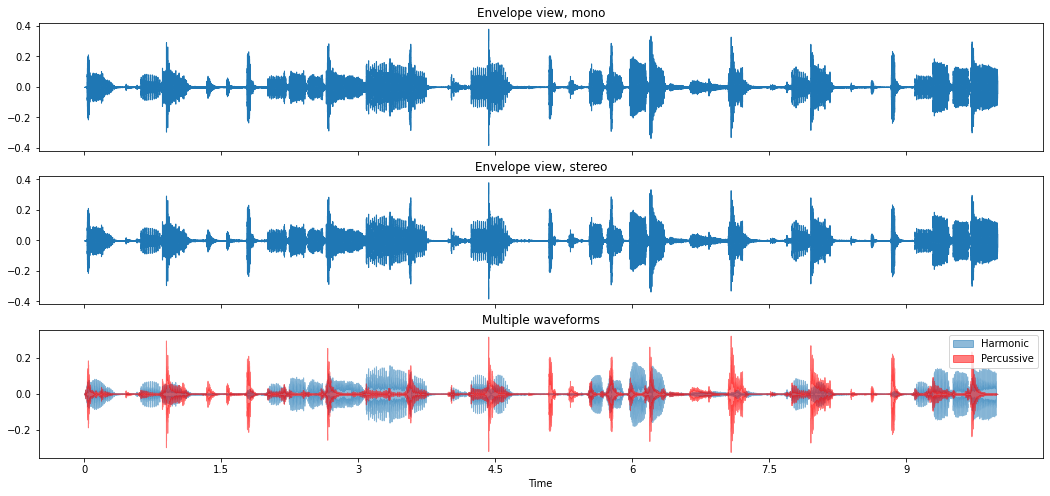

In [65]:
import matplotlib.pyplot as plt
import librosa.display

filename = file_choice

fig, ax = plt.subplots(nrows=3, sharex=True, figsize=(18, 8))

y, sr = librosa.load(filename, duration=10)
#y, sr = librosa.load(librosa.ex('choice'), duration=10)
librosa.display.waveshow(y, sr=sr, ax=ax[0])
ax[0].set(title='Envelope view, mono')
ax[0].label_outer()

y, sr = librosa.load(filename, mono=False, duration=10)
#y, sr = librosa.load(librosa.ex('choice', hq=True), mono=False, duration=10)
librosa.display.waveshow(y, sr=sr, ax=ax[1])
ax[1].set(title='Envelope view, stereo')
ax[1].label_outer()

y, sr = librosa.load(filename, duration=10)
#y, sr = librosa.load(librosa.ex('choice'), duration=10)
y_harm, y_perc = librosa.effects.hpss(y)
librosa.display.waveshow(y_harm, sr=sr, alpha=0.5, ax=ax[2], label='Harmonic')
librosa.display.waveshow(y_perc, sr=sr, color='r', alpha=0.5, ax=ax[2], label='Percussive')
ax[2].set(title='Multiple waveforms')
ax[2].legend()

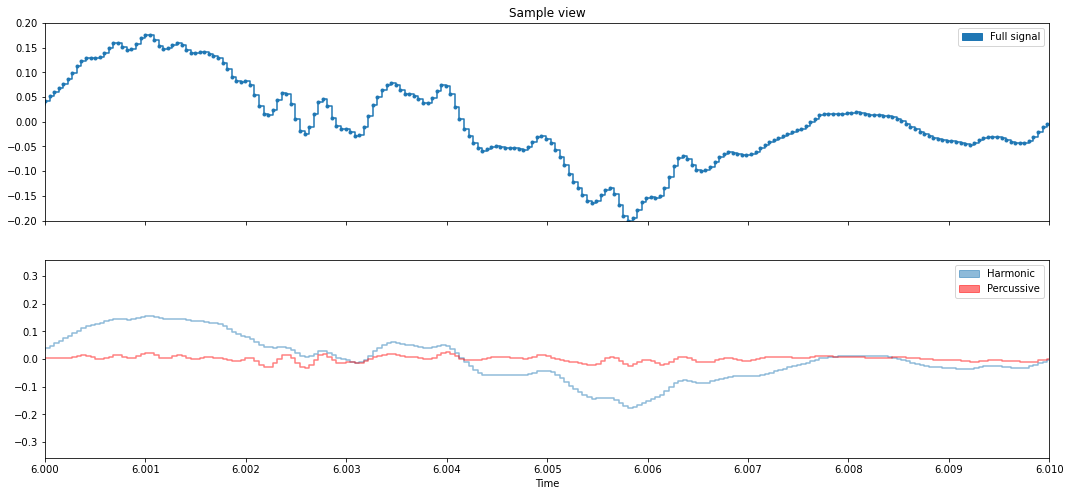

In [66]:
fig, (ax, ax2) = plt.subplots(nrows=2, sharex=True, figsize=(18, 8))
ax.set(xlim=[6.0, 6.01], title='Sample view', ylim=[-0.2, 0.2])
librosa.display.waveshow(y, sr=sr, ax=ax, marker='.', label='Full signal')
librosa.display.waveshow(y_harm, sr=sr, alpha=0.5, ax=ax2, label='Harmonic')
librosa.display.waveshow(y_perc, sr=sr, color='r', alpha=0.5, ax=ax2, label='Percussive')
ax.label_outer()
ax.legend()
ax2.legend()

### Spec show

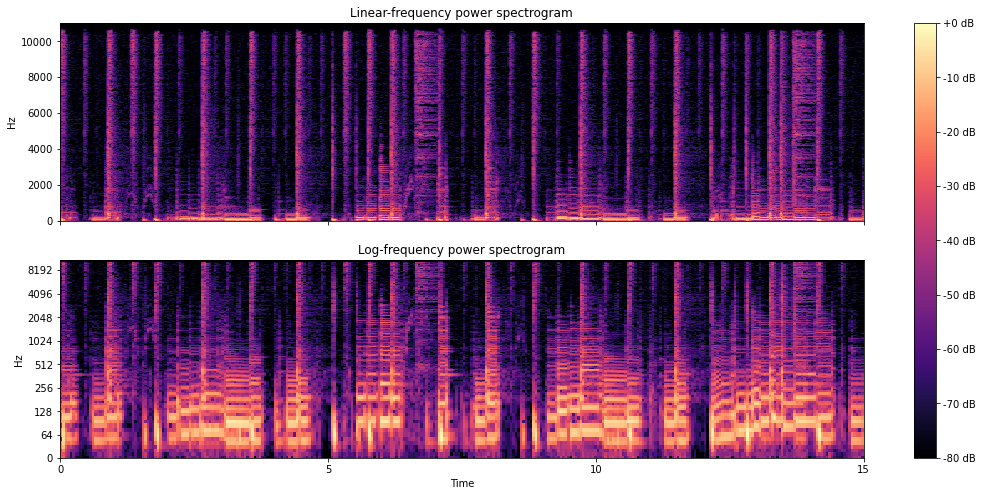

In [67]:
import matplotlib.pyplot as plt

y, sr = librosa.load(filename, duration=15)
#y, sr = librosa.load(librosa.ex('choice'), duration=15)

fig, ax = plt.subplots(nrows=2, ncols=1, sharex=True, figsize=(18, 8))
D = librosa.amplitude_to_db(np.abs(librosa.stft(y)), ref=np.max)
img = librosa.display.specshow(D, y_axis='linear', x_axis='time', sr=sr, ax=ax[0])
ax[0].set(title='Linear-frequency power spectrogram')
ax[0].label_outer()

hop_length = 1024
D = librosa.amplitude_to_db(np.abs(librosa.stft(y, hop_length=hop_length)), ref=np.max)
librosa.display.specshow(D, y_axis='log', sr=sr, hop_length=hop_length, x_axis='time', ax=ax[1])
ax[1].set(title='Log-frequency power spectrogram')
ax[1].label_outer()
fig.colorbar(img, ax=ax, format="%+2.f dB")

### Short-time Fourier transform (STFT)

In [78]:
y, sr = librosa.load(file_trumpet)
S = np.abs(librosa.stft(y))
S

array([[5.3953640e-03, 3.3315693e-03, 1.0328183e-03, ..., 2.2926326e-08,
        9.8623946e-07, 1.2011992e-05],
       [3.2442170e-03, 2.6903967e-03, 1.0622127e-03, ..., 2.4819453e-08,
        9.5359269e-07, 1.2008374e-05],
       [2.3986856e-03, 7.7155454e-04, 1.5704575e-03, ..., 2.5813943e-08,
        9.6956455e-07, 1.1990609e-05],
       ...,
       [7.4183219e-05, 3.6273319e-05, 1.2351239e-06, ..., 3.3514752e-04,
        7.0897001e-04, 8.2297879e-04],
       [7.5229633e-05, 3.7224112e-05, 1.3674936e-06, ..., 2.4655956e-04,
        1.1880830e-04, 1.0312897e-03],
       [7.6400574e-05, 3.9438059e-05, 1.9221090e-06, ..., 1.9005347e-04,
        5.1795773e-04, 1.3460773e-03]], dtype=float32)

In [83]:
# Use left-aligned frames, instead of centered frames
S_left = librosa.stft(y, center=False)
#S_left

In [82]:
# Use a shorter hop length
D_short = librosa.stft(y, hop_length=64)
#D_short

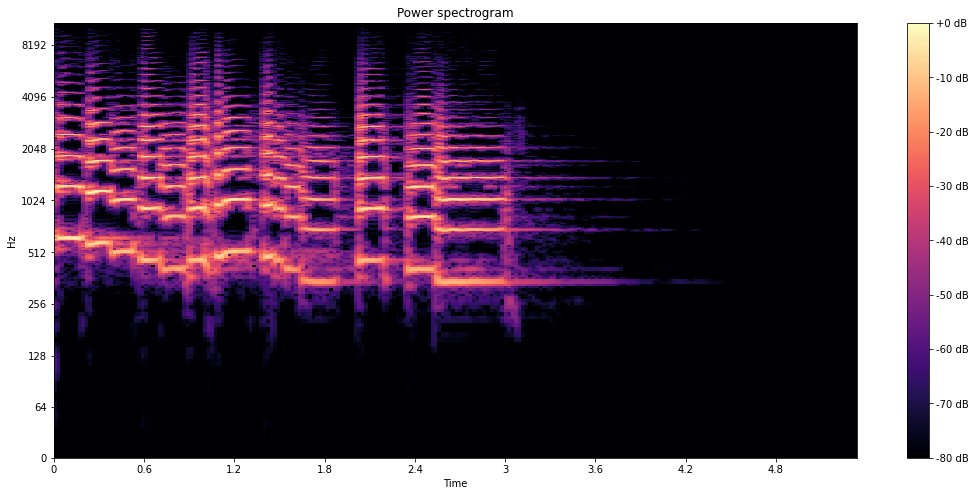

In [81]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(18, 8))
img = librosa.display.specshow(librosa.amplitude_to_db(S, ref=np.max),
                               y_axis='log', x_axis='time', ax=ax)
ax.set_title('Power spectrogram')
fig.colorbar(img, ax=ax, format="%+2.0f dB")

### To decibel (dB) units

In [84]:
# Get a power spectrogram from a waveform y
y, sr = librosa.load(file_trumpet)
S = np.abs(librosa.stft(y))
librosa.power_to_db(S ** 2)

array([[-41.80866, -41.80866, -41.80866, ..., -41.80866, -41.80866,
        -41.80866],
       [-41.80866, -41.80866, -41.80866, ..., -41.80866, -41.80866,
        -41.80866],
       [-41.80866, -41.80866, -41.80866, ..., -41.80866, -41.80866,
        -41.80866],
       ...,
       [-41.80866, -41.80866, -41.80866, ..., -41.80866, -41.80866,
        -41.80866],
       [-41.80866, -41.80866, -41.80866, ..., -41.80866, -41.80866,
        -41.80866],
       [-41.80866, -41.80866, -41.80866, ..., -41.80866, -41.80866,
        -41.80866]], dtype=float32)

In [85]:
# Compute dB relative to peak power
librosa.power_to_db(S ** 2, ref=np.max)

array([[-80., -80., -80., ..., -80., -80., -80.],
       [-80., -80., -80., ..., -80., -80., -80.],
       [-80., -80., -80., ..., -80., -80., -80.],
       ...,
       [-80., -80., -80., ..., -80., -80., -80.],
       [-80., -80., -80., ..., -80., -80., -80.],
       [-80., -80., -80., ..., -80., -80., -80.]], dtype=float32)

In [86]:
# Or compare to median power
librosa.power_to_db(S ** 2, ref=np.median)

array([[16.57808, 16.57808, 16.57808, ..., 16.57808, 16.57808, 16.57808],
       [16.57808, 16.57808, 16.57808, ..., 16.57808, 16.57808, 16.57808],
       [16.57808, 16.57808, 16.57808, ..., 16.57808, 16.57808, 16.57808],
       ...,
       [16.57808, 16.57808, 16.57808, ..., 16.57808, 16.57808, 16.57808],
       [16.57808, 16.57808, 16.57808, ..., 16.57808, 16.57808, 16.57808],
       [16.57808, 16.57808, 16.57808, ..., 16.57808, 16.57808, 16.57808]],
      dtype=float32)

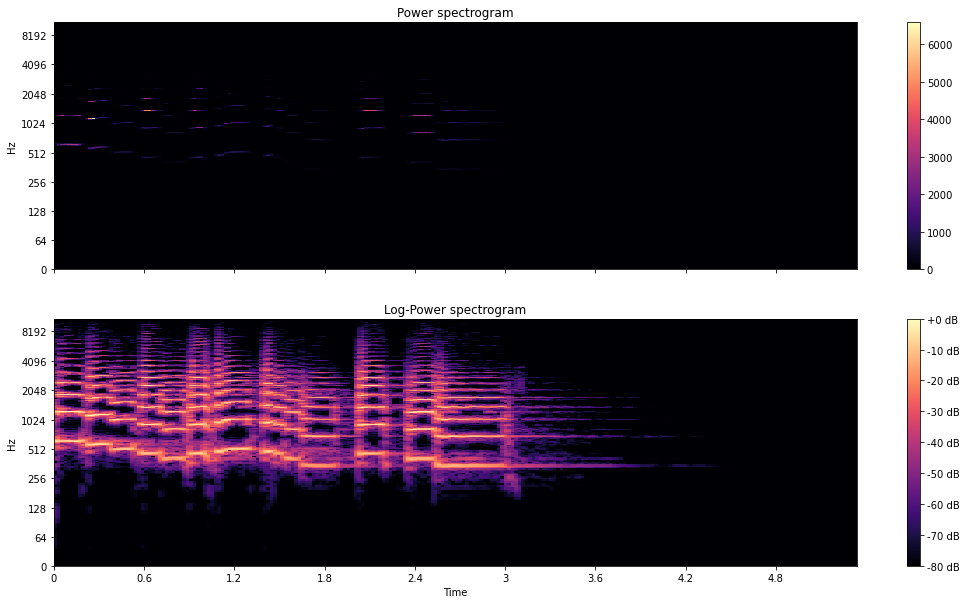

In [88]:
# And plot the results
import matplotlib.pyplot as plt
fig, ax = plt.subplots(nrows=2, sharex=True, sharey=True, figsize=(18, 10))
imgpow = librosa.display.specshow(S**2, sr=sr, y_axis='log', x_axis='time', ax=ax[0])
ax[0].set(title='Power spectrogram')
ax[0].label_outer()
imgdb = librosa.display.specshow(librosa.power_to_db(S**2, ref=np.max),
                                 sr=sr, y_axis='log', x_axis='time', ax=ax[1])
ax[1].set(title='Log-Power spectrogram')
fig.colorbar(imgpow, ax=ax[0])
fig.colorbar(imgdb, ax=ax[1], format="%+2.0f dB")

### Trim silence

In [89]:
# Load some audio
y, sr = librosa.load(file_choice)

# Trim the beginning and ending silence
yt, index = librosa.effects.trim(y)

# Print the durations
print(librosa.get_duration(y), librosa.get_duration(yt))

25.025986394557822 25.007891156462584


## Advanced usage

In [13]:
# Feature extraction example
import numpy as np
import librosa

# Load the example clip
filename = 'librosa/nutcracker.ogg'
y, sr = librosa.load(filename)
#y, sr = librosa.load(librosa.ex('nutcracker'))

# Set the hop length; at 22050 Hz, 512 samples ~= 23ms
hop_length = 512

In [15]:
# Separate harmonics and percussives into two waveforms
y_harmonic, y_percussive = librosa.effects.hpss(y)
# The result of this line is that the time series y has been 
# separated into two time series, containing the harmonic (tonal)
# and percussive (transient) portions of the signal. 
# Each of y_harmonic and y_percussive have the same shape and duration as y.

# Beat track on the percussive signal
tempo, beat_frames = librosa.beat.beat_track(y=y_percussive, sr=sr)
print('Estimated tempo: {:.2f} beats per minute\n'.format(tempo))
print("beat_frames:", beat_frames[:10])

Estimated tempo: 107.67 beats per minute

beat_frames: [ 51  74 100 124 149 173 198 221 246 270]


In [16]:
# Compute MFCC features from the raw signal
mfcc = librosa.feature.mfcc(y=y, sr=sr, hop_length=hop_length, n_mfcc=13)
# The output of this function is the matrix mfcc, which is a numpy.ndarray
# of shape (n_mfcc, T) (where T denotes the track duration in frames).

print("mfcc:", mfcc[:10])

mfcc: [[-602.36005 -602.36005 -602.36005 ... -602.36005 -602.36005 -602.36005]
 [   0.         0.         0.      ...    0.         0.         0.     ]
 [   0.         0.         0.      ...    0.         0.         0.     ]
 ...
 [   0.         0.         0.      ...    0.         0.         0.     ]
 [   0.         0.         0.      ...    0.         0.         0.     ]
 [   0.         0.         0.      ...    0.         0.         0.     ]]


In [17]:
# And the first-order differences (delta features)
mfcc_delta = librosa.feature.delta(mfcc)
# delta computes (smoothed) first-order differences among columns of its input
# The resulting matrix mfcc_delta has the same shape as the input mfcc.

print("mfcc_delta:", mfcc_delta[:10])

mfcc_delta: [[-1.4463899e-14 -1.4463899e-14 -1.4463899e-14 ... -6.2357583e-03
  -6.2357583e-03 -6.2357583e-03]
 [ 0.0000000e+00  0.0000000e+00  0.0000000e+00 ... -3.2735986e-03
  -3.2735986e-03 -3.2735986e-03]
 [ 0.0000000e+00  0.0000000e+00  0.0000000e+00 ...  6.3850912e-03
   6.3850912e-03  6.3850912e-03]
 ...
 [ 0.0000000e+00  0.0000000e+00  0.0000000e+00 ...  4.0601902e-03
   4.0601902e-03  4.0601902e-03]
 [ 0.0000000e+00  0.0000000e+00  0.0000000e+00 ...  8.7737581e-03
   8.7737581e-03  8.7737581e-03]
 [ 0.0000000e+00  0.0000000e+00  0.0000000e+00 ...  2.4554799e-03
   2.4554799e-03  2.4554799e-03]]


In [18]:
# Stack and synchronize between beat events
# This time, we'll use the mean value (default) instead of median
beat_mfcc_delta = librosa.util.sync(np.vstack([mfcc, mfcc_delta]), beat_frames)
# sync aggregates columns of its input between sample indices (e.g., beat frames)

# Here, we’ve vertically stacked the mfcc and mfcc_delta matrices together.
# The result of this operation is a matrix beat_mfcc_delta with the same number of
# rows as its input, but the number of columns depends on beat_frames.
# Each column beat_mfcc_delta[:, k] will be the average of input columns between
# beat_frames[k] and beat_frames[k+1]. (beat_frames will be expanded to span the
# full range [0, T] so that all data is accounted for.)

print("beat_mfcc_delta:", beat_mfcc_delta[:10])

beat_mfcc_delta: [[-5.96049988e+02 -4.71975800e+02 -4.18740723e+02 ... -2.30209213e+02
  -1.81633041e+02 -4.22515228e+02]
 [ 5.29752111e+00  1.19491829e+02  1.19481026e+02 ...  6.63411026e+01
   6.66919479e+01  7.45729675e+01]
 [ 1.79374278e+00  5.01075478e+01  1.31605749e+01 ... -6.48235550e+01
  -6.93393097e+01 -2.06293182e+01]
 ...
 [ 2.53597409e-01  4.66320467e+00 -5.70270777e+00 ... -2.36212521e+01
  -2.08896160e+01 -1.20064182e+01]
 [ 2.90146679e-01  8.00021946e-01 -7.51425982e+00 ... -4.71391182e+01
  -4.25285378e+01 -1.56765013e+01]
 [ 3.42657000e-01  4.90409285e-01 -9.95222950e+00 ... -3.16722355e+01
  -1.90740700e+01  4.66936260e-01]]


In [19]:
# Compute chroma features from the harmonic signal
chromagram = librosa.feature.chroma_cqt(y=y_harmonic, sr=sr)
# compute a chromagram using just the harmonic component
# chromagram will be a numpy.ndarray of shape (12, T), and
# each row corresponds to a pitch class (e.g., C, C#, etc.).
# Each column of chromagram is normalized by its peak value, 
# though this behavior can be overridden by setting the norm parameter.

print("chromagram:", chromagram[:10])

chromagram: [[0.5482847  0.5595707  0.34219223 ... 0.0885649  0.21623796 0.4957516 ]
 [0.18835232 0.10942079 0.12314936 ... 0.16239384 0.15858243 0.29612964]
 [0.42940384 0.31900617 0.23598973 ... 0.5192451  0.39963502 0.33668643]
 ...
 [0.45835537 0.26936176 0.1992921  ... 0.6691639  0.48805654 0.5845173 ]
 [0.33193055 0.36074975 0.2105191  ... 0.12571427 0.13479151 0.3387061 ]
 [0.71646214 0.48105454 0.24196233 ... 0.11832213 0.15542477 0.36890924]]


In [20]:
# Aggregate chroma features between beat events
# We'll use the median value of each feature between beat frames
beat_chroma = librosa.util.sync(chromagram,
                                beat_frames,
                                aggregate=np.median)

print("beat_chroma:", beat_chroma[:10])

beat_chroma: [[0.30254456 0.0334522  0.1058374  ... 0.15276003 0.07555082 0.0814149 ]
 [0.25782844 0.04074808 0.08428392 ... 0.09633808 0.12807782 0.0932549 ]
 [0.3997867  0.0575659  0.09429981 ... 0.44611084 0.186589   0.13245766]
 ...
 [0.25719434 0.022998   0.42786378 ... 1.         0.24879554 0.23143637]
 [0.19592051 0.01583843 0.08924258 ... 0.09131315 0.08076533 0.07372805]
 [0.24086341 0.01813983 0.03972691 ... 0.18358052 0.90317076 0.04014792]]


In [21]:
# Finally, stack all beat-synchronous features together
beat_features = np.vstack([beat_chroma, beat_mfcc_delta])
# resulting in a feature matrix beat_features of 
# shape (12 + 13 + 13, # beat intervals).

print("beat_features:", beat_features[:10])

beat_features: [[0.30254456 0.0334522  0.1058374  ... 0.15276003 0.07555082 0.0814149 ]
 [0.25782844 0.04074808 0.08428392 ... 0.09633808 0.12807782 0.0932549 ]
 [0.3997867  0.0575659  0.09429981 ... 0.44611084 0.186589   0.13245766]
 ...
 [0.25719434 0.022998   0.42786378 ... 1.         0.24879554 0.23143637]
 [0.19592051 0.01583843 0.08924258 ... 0.09131315 0.08076533 0.07372805]
 [0.24086341 0.01813983 0.03972691 ... 0.18358052 0.90317076 0.04014792]]
